In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('data/cs448b_ipasn.csv')
df['date']= pd.to_datetime(df['date'])
df = df.groupby(['date','l_ipn'],as_index=False).sum()
df['yday'] = df['date'].dt.dayofyear
df['wday'] = df['date'].dt.dayofweek

In [3]:
#creating all IPs

ip0 = df[df['l_ipn']==0]
max0 = np.max(ip0['f'])
ip1 = df[df['l_ipn']==1]
max1 = np.max(ip1['f'])
ip2 = df[df['l_ipn']==2]
max2 = np.max(ip2['f'])
ip3 = df[df['l_ipn']==3]
max3 = np.max(ip3['f'])
ip4 = df[df['l_ipn']==4]
max4 = np.max(ip4['f'])
ip5 = df[df['l_ipn']==5]
max5 = np.max(ip5['f'])
ip6 = df[df['l_ipn']==6]
max6 = np.max(ip6['f'])
ip7 = df[df['l_ipn']==7]
max7 = np.max(ip7['f'])
ip8 = df[df['l_ipn']==8]
max8 = np.max(ip8['f'])
ip9 = df[df['l_ipn']==9]
max9 = np.max(ip9['f'])

Text(0.5, 1.0, 'Daily server 9 Traffic')

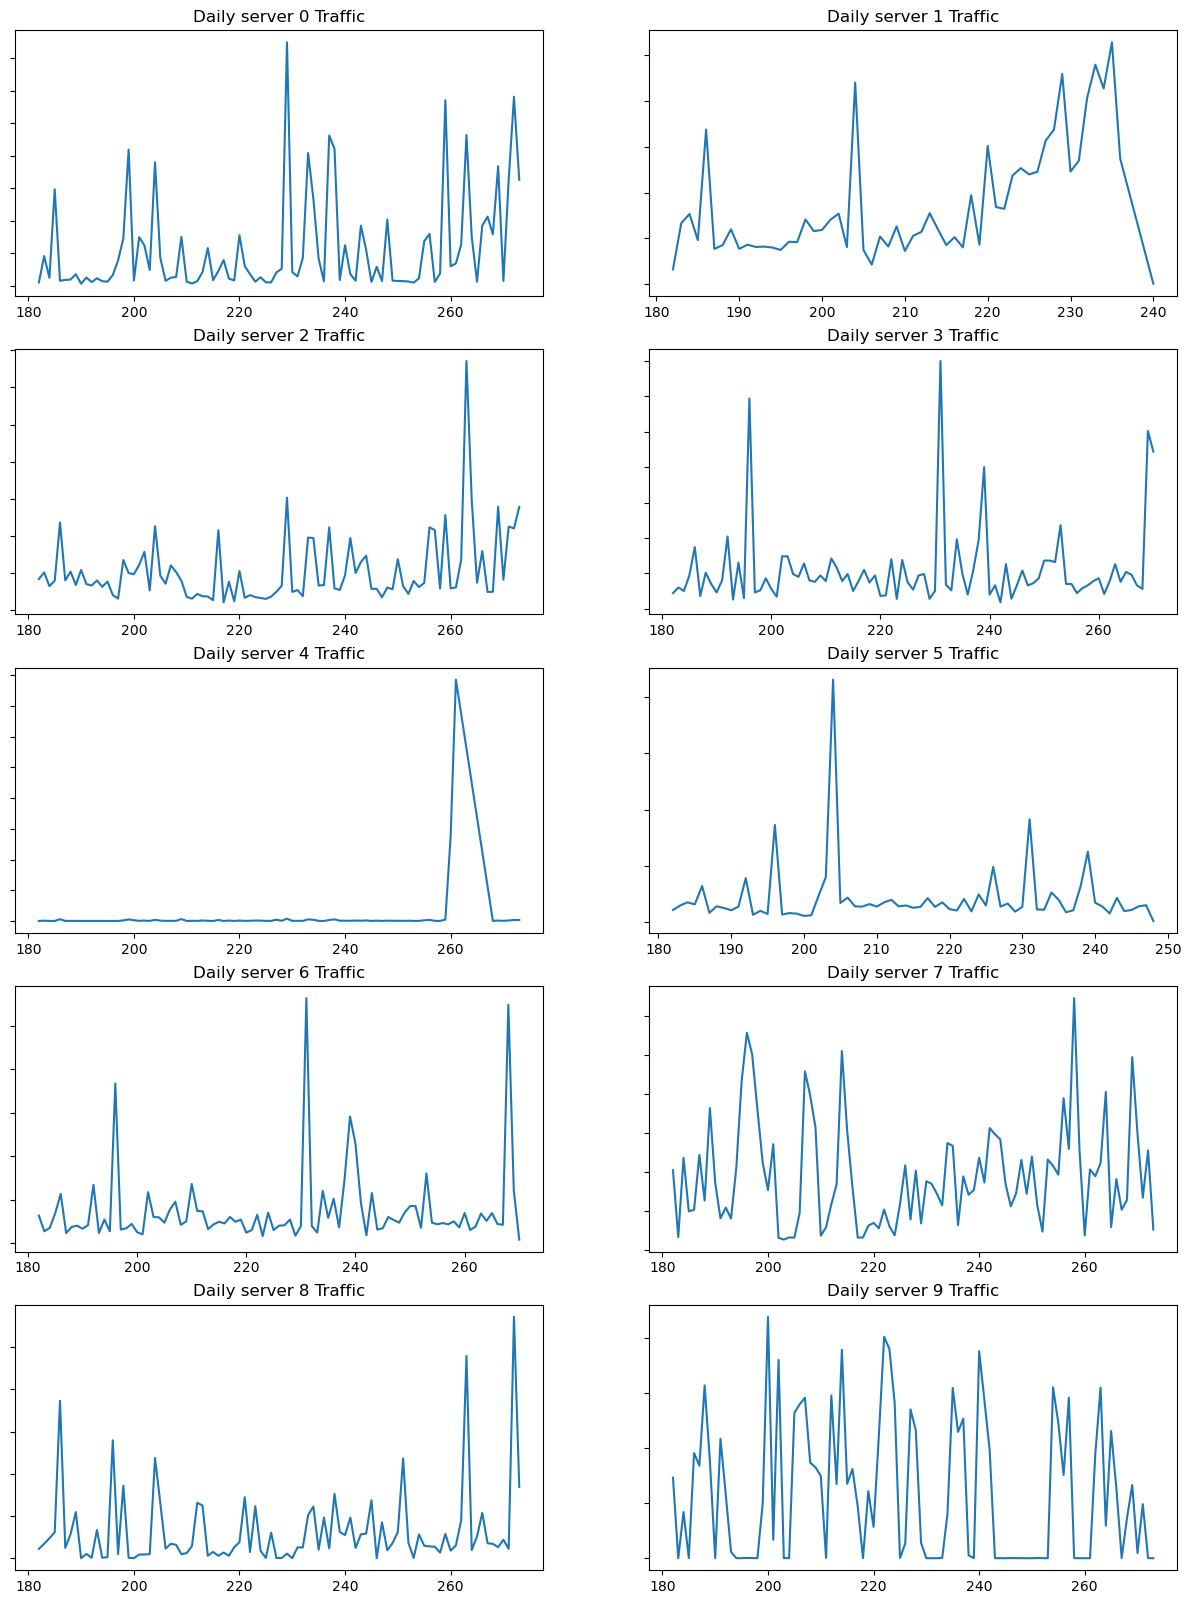

In [4]:
f,axarray = plt.subplots(5,2,figsize=(15,20))

axarray[0,0].plot(ip0['yday'],ip0['f'])
axarray[0,0].set_yticklabels([])
axarray[0,0].set_title("Daily server 0 Traffic")


axarray[0,1].plot(ip1['yday'], ip1['f'])
axarray[0,1].set_yticklabels([])
axarray[0,1].set_title("Daily server 1 Traffic")                                


axarray[1,0].plot(ip2['yday'], ip2['f'])
axarray[1,0].set_yticklabels([])
axarray[1,0].set_title("Daily server 2 Traffic")

axarray[1,1].plot(ip3['yday'], ip3['f'])
axarray[1,1].set_yticklabels([])
axarray[1,1].set_title("Daily server 3 Traffic")
                                
axarray[2,0].plot(ip4['yday'], ip4['f'])
axarray[2,0].set_yticklabels([])
axarray[2,0].set_title("Daily server 4 Traffic")

axarray[2,1].plot(ip5['yday'], ip5['f'])
axarray[2,1].set_yticklabels([])
axarray[2,1].set_title("Daily server 5 Traffic")

axarray[3,0].plot(ip6['yday'], ip6['f'])
axarray[3,0].set_yticklabels([])
axarray[3,0].set_title("Daily server 6 Traffic")

axarray[3,1].plot(ip7['yday'], ip7['f'])
axarray[3,1].set_yticklabels([])
axarray[3,1].set_title("Daily server 7 Traffic")

axarray[4,0].plot(ip8['yday'], ip8['f'])
axarray[4,0].set_yticklabels([])
axarray[4,0].set_title("Daily server 8 Traffic")

axarray[4,1].plot(ip9['yday'], ip9['f'])
axarray[4,1].set_yticklabels([])
axarray[4,1].set_title("Daily server 9 Traffic")

In [5]:
#normalizing data for use in RNN

fv =[float(v)/float(max0) for v in ip0['f'].values]
ip0.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max1) for v in ip1['f'].values]
ip1.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max2) for v in ip2['f'].values]
ip2.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max3) for v in ip3['f'].values]
ip3.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max4) for v in ip4['f'].values]
ip4.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max5) for v in ip5['f'].values]
ip5.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max6) for v in ip6['f'].values]
ip6.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max7) for v in ip7['f'].values]
ip7.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max8) for v in ip8['f'].values]
ip8.loc[:,'f'] =np.array(fv).reshape(-1,1)
fv =[float(v)/float(max9) for v in ip9['f'].values]
ip9.loc[:,'f'] =np.array(fv).reshape(-1,1)

In [6]:
#creates list of features and target for the model

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset['f'].iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [7]:
#train a single RNN

#from keras.layers.wrappers import TimeDistributed
from keras.layers import TimeDistributed
from keras.constraints import nonneg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM

look_back = 14

def trainModelLSTM(data):
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    
    model = Sequential()
    model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=0)
    
    return model


def trainModel(data):
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    model = Sequential()
    model.add(GRU(64,input_shape=(trainX.shape[1], trainX.shape[2]),
               return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])
    model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=0)
    return model

def trainModelCNN(data):
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    
    model = Sequential()
    model.add(Conv1D(64, 3, input_shape=(look_back, 2), activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=0)
    
    return model

def trainModelAttention(data):
    data['f'] = data['f'].astype('float32')
    train = data[0:look_back*5].copy()
    trainX, trainY = create_dataset(train, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], look_back, 2))
    
    model = Sequential()
    model.add(Conv1D(64, 3, input_shape=(look_back, 2), activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=0)
    
    return model

In [8]:
#perform load balancing with trained model(make prediction of best load distribution)

def predictFlow(_model,data):
    ypred=[0]*look_back
    #_max = np.max(data['f'])
    for k in range(len(data)-look_back):
        pattern = data[k:k+look_back].values
        x = np.reshape(pattern, (1, len(pattern), 2))
        ypred.append(_model.predict(x)[0][0])
    return ypred

In [9]:
#training the individual models

m0 = trainModel(ip0[['f','wday']].copy())
m1 = trainModel(ip1[['f','wday']].copy())
m2 = trainModel(ip2[['f','wday']].copy())
m3 = trainModel(ip3[['f','wday']].copy())
m4 = trainModel(ip4[['f','wday']].copy())
m5 = trainModel(ip5[['f','wday']].copy())
m6 = trainModel(ip6[['f','wday']].copy())
m7 = trainModel(ip7[['f','wday']].copy())
m8 = trainModel(ip8[['f','wday']].copy())
m9 = trainModel(ip9[['f','wday']].copy())

2023-11-28 20:30:01.703436: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
m0c = trainModelCNN(ip0[['f','wday']].copy())
m1c = trainModelCNN(ip1[['f','wday']].copy())
m2c = trainModelCNN(ip2[['f','wday']].copy())
m3c = trainModelCNN(ip3[['f','wday']].copy())
m4c = trainModelCNN(ip4[['f','wday']].copy())
m5c = trainModelCNN(ip5[['f','wday']].copy())
m6c = trainModelCNN(ip6[['f','wday']].copy())
m7c = trainModelCNN(ip7[['f','wday']].copy())
m8c = trainModelCNN(ip8[['f','wday']].copy())
m9c = trainModelCNN(ip9[['f','wday']].copy())

In [11]:
m0l = trainModelLSTM(ip0[['f','wday']].copy())
m1l = trainModelLSTM(ip1[['f','wday']].copy())
m2l = trainModelLSTM(ip2[['f','wday']].copy())
m3l = trainModelLSTM(ip3[['f','wday']].copy())
m4l = trainModelLSTM(ip4[['f','wday']].copy())
m5l = trainModelLSTM(ip5[['f','wday']].copy())
m6l = trainModelLSTM(ip6[['f','wday']].copy())
m7l = trainModelLSTM(ip7[['f','wday']].copy())
m8l = trainModelLSTM(ip8[['f','wday']].copy())
m9l = trainModelLSTM(ip9[['f','wday']].copy())


In [12]:
m0a = trainModelAttention(ip0[['f','wday']].copy())
m1a = trainModelAttention(ip1[['f','wday']].copy())
m2a = trainModelAttention(ip2[['f','wday']].copy())
m3a = trainModelAttention(ip3[['f','wday']].copy())
m4a = trainModelAttention(ip4[['f','wday']].copy())
m5a = trainModelAttention(ip5[['f','wday']].copy())
m6a = trainModelAttention(ip6[['f','wday']].copy())
m7a = trainModelAttention(ip7[['f','wday']].copy())
m8a = trainModelAttention(ip8[['f','wday']].copy())
m9a = trainModelAttention(ip9[['f','wday']].copy())

In [13]:
# Define the number of models and related variables
num_models = 10
models = [m0, m1, m2, m3, m4, m5, m6, m7, m8, m9]
modelsCNN = [m0c, m1c, m2c, m3c, m4c, m5c, m6c, m7c, m8c, m9c]
modelsLSTM = [m0l, m1l, m2l, m3l, m4l, m5l, m6l, m7l, m8l, m9l]
modelsAttention = [m0a, m1a, m2a, m3a, m4a, m5a, m6a, m7a, m8a, m9a]
max_values = [max0, max1, max2, max3, max4, max5, max6, max7, max8, max9]
ip_data = [ip0[['f', 'wday']].copy(), ip1[['f', 'wday']].copy(), ip2[['f', 'wday']].copy(), ip3[['f', 'wday']].copy(), ip4[['f', 'wday']].copy(), ip5[['f', 'wday']].copy(), ip6[['f', 'wday']].copy(), ip7[['f', 'wday']].copy(), ip8[['f', 'wday']].copy(), ip9[['f', 'wday']].copy()]

# Initialize arrays to store results
ypred = [None] * num_models
ypredCNN = [None] * num_models
ypredLSTM = [None] * num_models
ypredAttention = [None] * num_models
ipf = [None] * num_models

# d = np.multiply(predictFlow(models[0], ip_data[0]), max_values[0])
# Loop through the models and data
for i in range(num_models):
    ypred[i] = np.multiply(predictFlow(models[i], ip_data[i]), max_values[i])
    ypredCNN[i] = np.multiply(predictFlow(modelsCNN[i], ip_data[i]), max_values[i])
    ypredLSTM[i] = np.multiply(predictFlow(modelsLSTM[i], ip_data[i]), max_values[i]) 
    ypredAttention[i] = np.multiply(predictFlow(modelsAttention[i], ip_data[i]), max_values[i])
#     ypred[i] = d
#     ypredCNN[i] = d
#     ypredLSTM[i] = d 
    
    ipf[i] = np.multiply(ip_data[i]['f'], max_values[i])

1/1 [==============================] - 0s 11ms/step


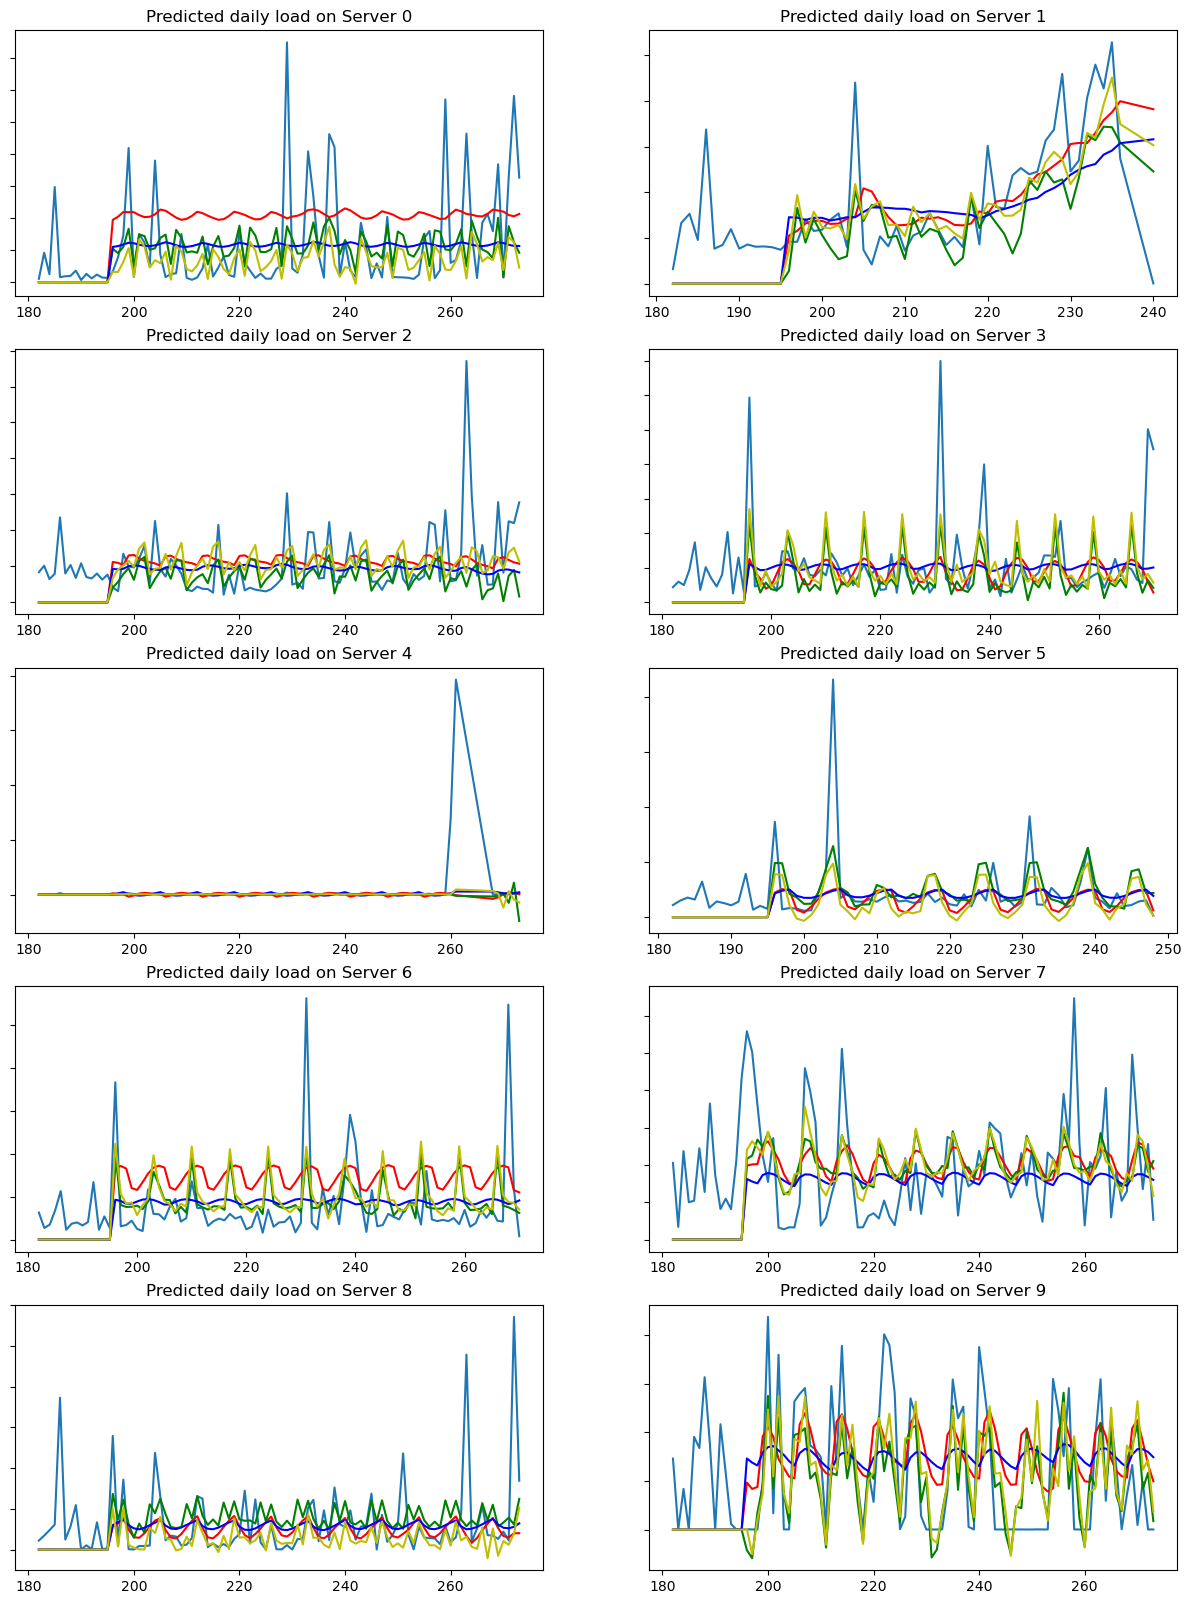

In [14]:
# Define the number of servers
num_servers = 10
f,axarray = plt.subplots(5,2,figsize=(15,20))
# Loop through each server and plot the data
for i in range(num_servers):
    row_index = i // 2
    col_index = i % 2
    ax = axarray[row_index, col_index]
    
    ip_data = locals()['ip{}'.format(i)]
    ipf_data = ipf[i]
    
    ax.plot(ip_data['yday'], ipf_data)
    ax.plot(ip_data['yday'], ypred[i], color='r', alpha=1)
    ax.plot(ip_data['yday'], ypredCNN[i], color='g', alpha=1)
    ax.plot(ip_data['yday'], ypredLSTM[i], color='b', alpha=1)
    ax.plot(ip_data['yday'], ypredAttention[i], color='y', alpha=1)
    ax.set_yticklabels([])
    ax.set_title(f"Predicted daily load on Server {i}")

plt.show()